In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px               #Whatever graphs we are plotting in seaborn plot it using plotly

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data analytics training/Project 1/laptop_price.csv',encoding = 'latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Data Cleaning

In [ ]:
#df.dropna
#df.drop
df.drop(columns = ['laptop_ID','Product'],inplace = True)


In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1274, 11)

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62kg,1249.0
881,HP,2 in 1 Convertible,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.3kg,684.8
817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23kg,385.0


In [ ]:
# 89.07 INR >> 1 euro
# 299.0*89.07 = INR

In [ ]:
df['Price_euros'] = round(df['Price_euros']*89.07).astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
df.rename(columns = {'Price_euros':'Price'},inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
# RAM coverting from col to numeric Col
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [ ]:
a = '4GB'
type(a)

str

In [ ]:
a.replace('GB','')

'4'

In [ ]:
(lambda a :a.replace("GB",""))('16GB')

'16'

In [ ]:
df['Ram'] = df['Ram'].apply(lambda a :a.replace("GB","")).astype('int')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119326
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80069
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51215
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226011
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160647


In [ ]:
#EDA
df['Ram'].value_counts()

,count
Ram,
8,613
4,366
16,198
6,35
12,25
32,17
2,16
24,3
64,1


<Axes: xlabel='Ram', ylabel='Price'>

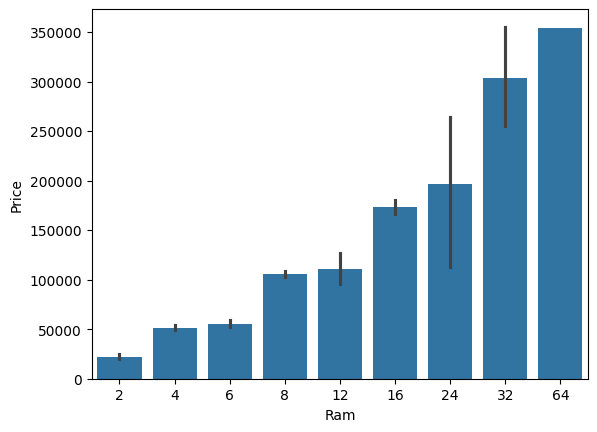

In [ ]:
sns.barplot(x = df['Ram'], y = df['Price'])

# Documentation

In [ ]:
df['Weight'] = df['Weight'].apply(lambda a :a.replace("kg","")).astype(float)

In [ ]:
df['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


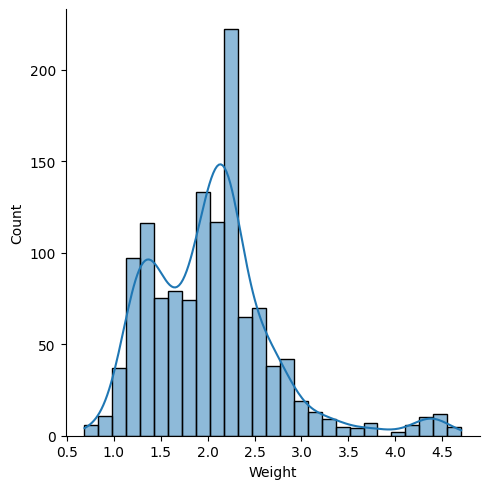

In [ ]:
sns.displot(x = df['Weight'], kde = True)

<Axes: xlabel='Weight', ylabel='Price'>

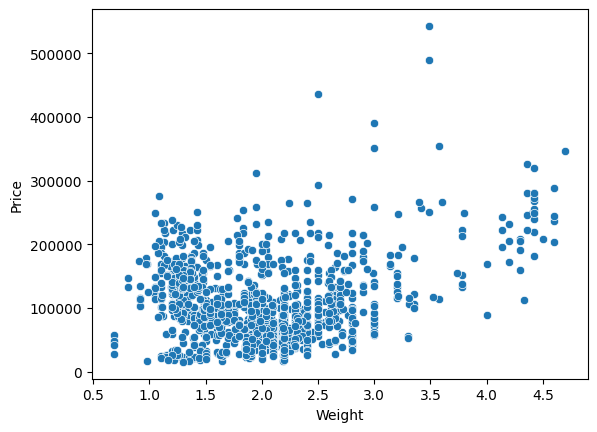

In [ ]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

# Doc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,34292


In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
df.shape   #Before dropping companies


(1274, 11)

In [ ]:
#Filtering for the companies which has repeated more than 10 times in the dataset
df = df[df.groupby('Company')["Company"].transform('count') > 10]

In [ ]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


In [ ]:
df.shape      #After dropping companies

(1223, 11)

<Axes: xlabel='Company', ylabel='Price'>

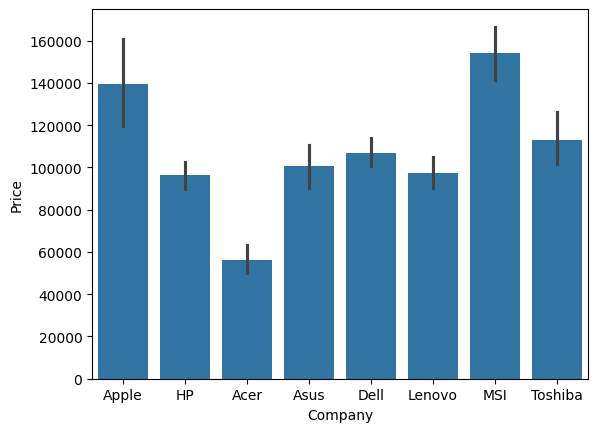

In [ ]:
sns.barplot(x = df['Company'], y = df['Price'])

# Document

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
231,HP,Notebook,15.6,1366x768,AMD E-Series 9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.1,29393


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

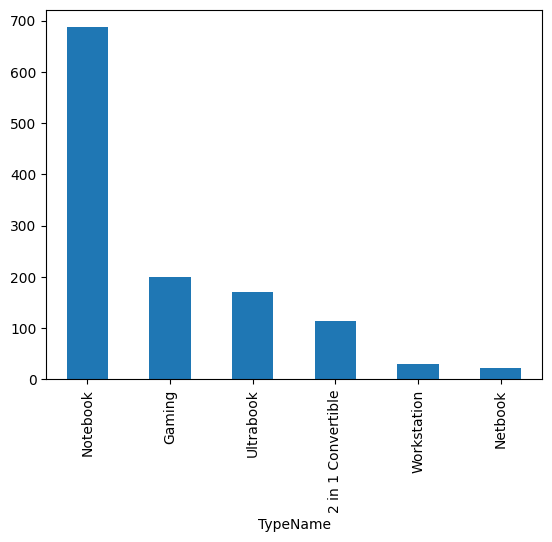

In [ ]:
df['TypeName'].value_counts().plot(kind = 'bar')

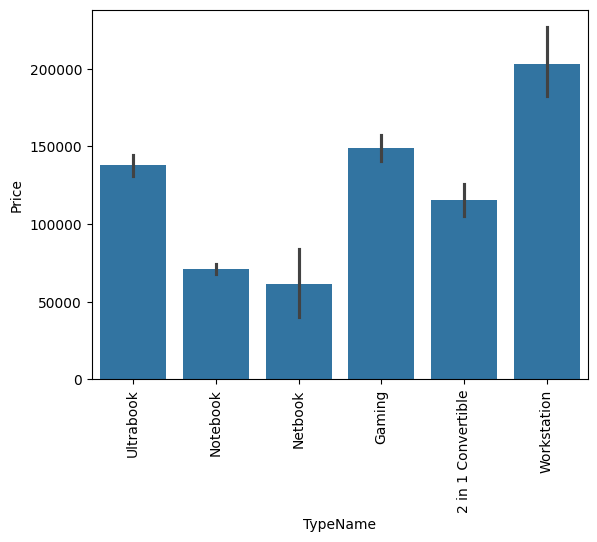

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [ ]:
df = df[df.groupby('Inches')["Inches"].transform('count') > 10]

In [ ]:
df.shape    #after Filtering

(1198, 11)

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29


<ipython-input-52-89f763ca4b2b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


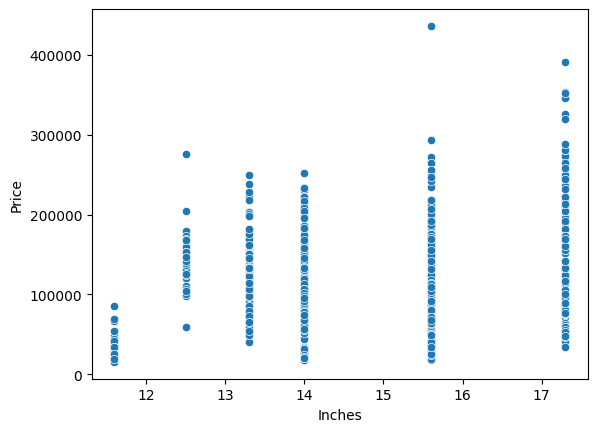

In [ ]:
#Inches vs Price
sns.scatterplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

<ipython-input-53-0ee6d3890cf5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')


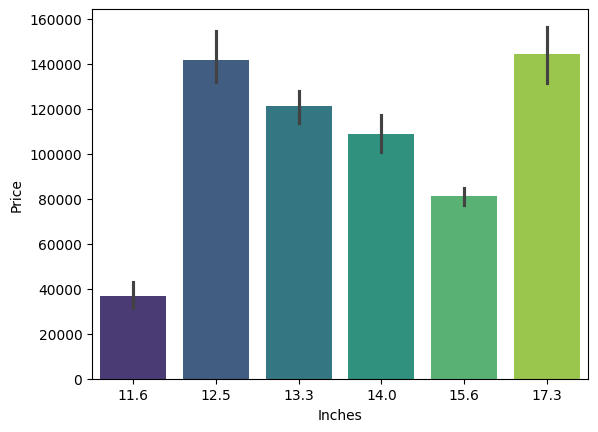

In [ ]:
#Inches vs Price
sns.barplot(x = df['Inches'], y = df['Price'] , palette = 'viridis')
plt.show()

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
385,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,203258


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
a = 'IPS Panel Full HD / Touchscreen 1920x1080'
#X_res = 1920 , Y_res = 1080

In [ ]:
a.split()[-1]

'1920x1080'

In [ ]:
a.split()[-1].split('x')

['1920', '1080']

In [ ]:
a.split()[-1].split('x')[0]   #X_res

'1920'

In [ ]:
a.split()[-1].split('x')[1]   #Y_res

'1080'

In [ ]:
(lambda x : x.split()[-1].split('x')[0])('1920x1080')   #X_res

'1920'

In [ ]:
(lambda x : x.split()[-1].split('x')[1])('1920x1080')   #Y_res

'1080'

In [ ]:
df['X_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[0])).astype('int')

In [ ]:
df['Y_res'] = df['ScreenResolution'].apply((lambda x : x.split()[-1].split('x')[1])).astype('int')

In [ ]:
def pow(a,b):
  return a**b

In [ ]:
x = lambda a : a**2

In [ ]:
x(2)

4

In [ ]:
pow(2,3)

8

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768


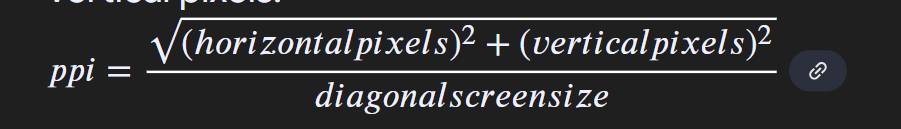

Pixels per inch (PPI) refers to the number of pixels contained within each inch of a digital image. It also refers to the set number of pixels a screen can display. Generally speaking, the higher the PPI, the better the image quality.

In [ ]:
#Add a column for ppi
#X_res
#Y_res
#Inches


In [ ]:
df['ppi'] = round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches'])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi
219,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.62,113921,1920,1080,166.0


In [ ]:
#ppi vs price analysis
df['ppi'].value_counts()

,count
ppi,
141.0,419
100.0,194
127.0,131
157.0,122
166.0,100
112.0,42
135.0,28
276.0,25
176.0,25


<Axes: xlabel='ppi', ylabel='Price'>

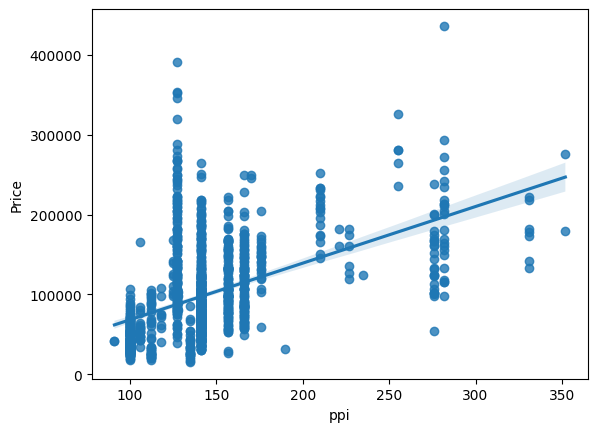

In [ ]:
sns.regplot(x = df['ppi'], y = df['Price'])

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
a ='IPS Panel Full HD / Touchscreen 1920x1080'
#if there is IPS in this str then return 1 else 0
(lambda a: 1 if 'IPS' in a else 0)('IPS Panel Full HD / Touchscreen 1920x1080')

1

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda a: 1 if 'IPS' in a else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600,227.0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900,128.0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080,141.0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600,227.0,1
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768,100.0,0


In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda a: 1 if 'Touchscreen' in a else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,ppi,IPS,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,2560,1600,227.0,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,1440,900,128.0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,1920,1080,141.0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,2560,1600,227.0,1,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,1366,768,100.0,0,0


<Axes: xlabel='TouchScreen'>

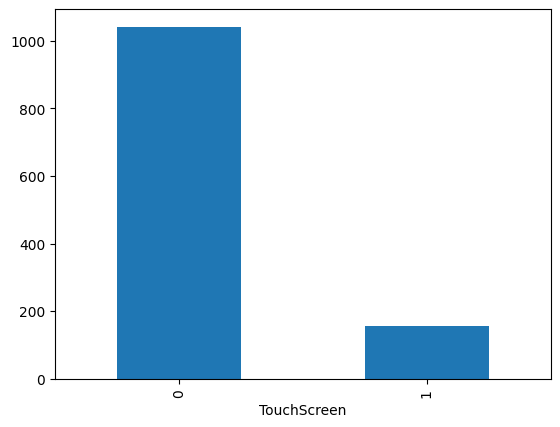

In [ ]:
df['TouchScreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='ppi'>

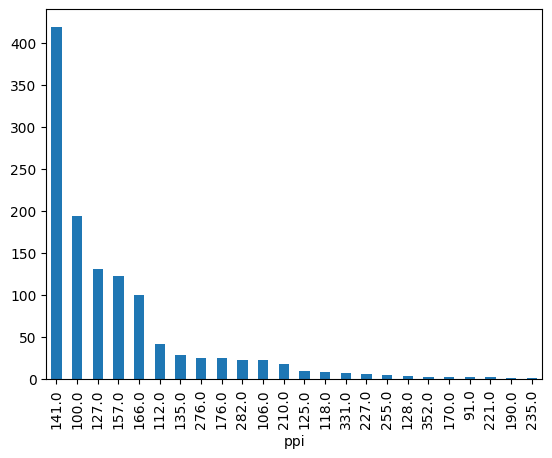

In [ ]:
df['ppi'].value_counts().plot(kind = 'bar')

In [ ]:
df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace = True)

In [ ]:
df.shape

(1198, 12)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119326,227.0,1,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80069,128.0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51215,141.0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160647,227.0,1,0
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,35628,100.0,0,0


<Axes: xlabel='Cpu'>

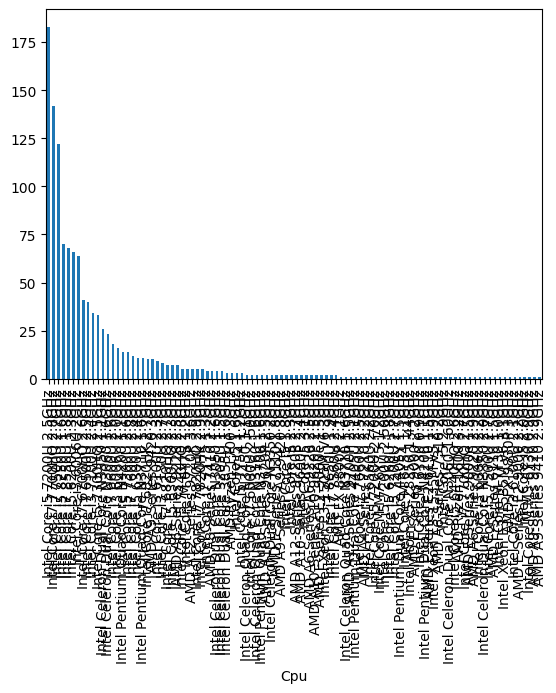

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


In [ ]:
a = 'Intel Core i5 7200U 2.5GHz'

In [ ]:
a.split()        #to convert str into list

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [ ]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [ ]:
' '.join(a.split()[0:3])

'Intel Core i5'

In [ ]:
(lambda a: ' '.join(a.split()[0:3]))('AMD E-Series E2-9000 2.2GHz')

'AMD E-Series E2-9000'

In [ ]:
df['Cpu'] = df['Cpu'].apply(lambda a: ' '.join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [ ]:
#Will filter the AMD cpu w.r.t the Series
#AMD A9-Series 9420  >> AMD A-Series
#AMD E-Series 9000   >> AMD E-Series
#AMD FX 8800P        >> AMD F-Series

In [ ]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    if text[4] == 'E':
      return 'AMD E-Series'
    elif text[4] == 'A':
      return 'AMD A-Series'
    elif text[4] == 'F':
      return 'AMD F-Series'
    else:
      return 'AMD Ryzen Series'


In [ ]:
fetch_pro('Intel Core i7')

'Intel Core i7'

In [ ]:
df['Cpu'] = df['Cpu'].apply(fetch_pro)

<Axes: xlabel='Cpu'>

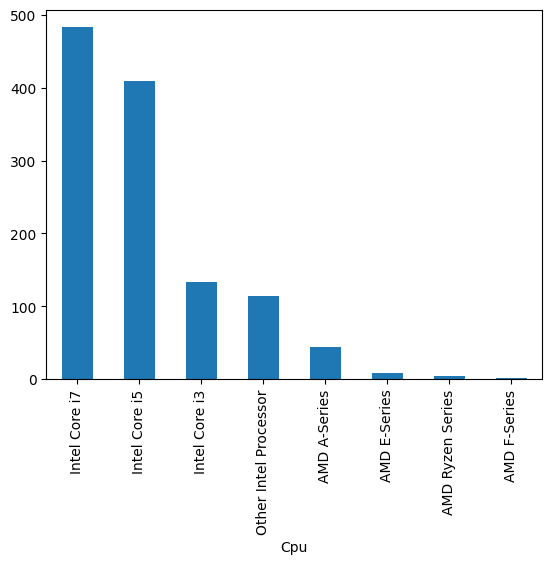

In [ ]:
df['Cpu'].value_counts().plot(kind = 'bar')

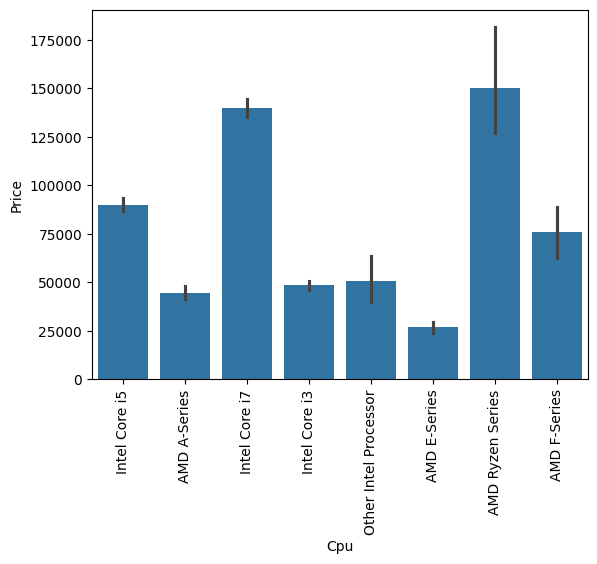

In [ ]:
sns.barplot(x = df['Cpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

# doc

In [ ]:
a = 'Intel Celeron Dual'
a.split()[0]

'Intel'

In [ ]:
b = 'AMD E-Series E2-6110'
b[4]

'E'

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
512,Dell,Notebook,Intel Core i5,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,74463,141.0,0,0
1246,Dell,Notebook,Intel Core i5,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,77936,112.0,0,0
229,HP,Notebook,Intel Core i7,8,1TB HDD,AMD FirePro W4190M,Windows 10,1.90,113030,141.0,0,0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,262
Intel HD Graphics 520,179
Nvidia GeForce GTX 1050,65
Intel UHD Graphics 620,64
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


<Axes: xlabel='Gpu'>

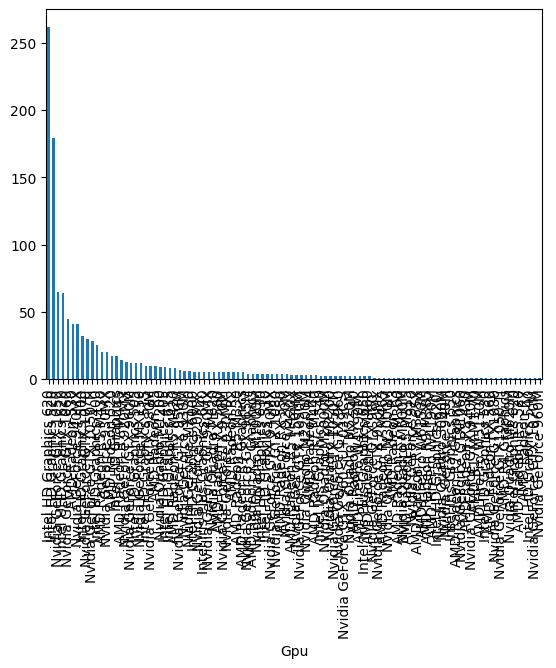

In [ ]:
df['Gpu'].value_counts().plot(kind = 'bar')

In [ ]:
a = 'Intel HD Graphics 620'

In [ ]:
a.split()

['Intel', 'HD', 'Graphics', '620']

In [ ]:
a.split()[0:2]

['Intel', 'HD']

In [ ]:
" ".join(a.split()[0:2])

'Intel HD'

In [ ]:
(lambda a:" ".join(a.split()[0:2]))('AMD Radeon R5 520')

'AMD Radeon'

In [ ]:
df['Gpu'] = df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


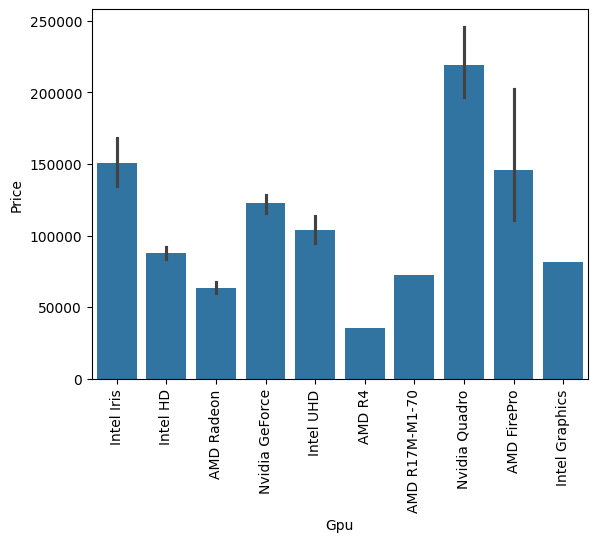

In [ ]:
sns.barplot(x = df['Gpu'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

# Document

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
868,Acer,Notebook,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,1.56,80341,157.0,1,0


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [ ]:
#Wherever we have Windows 10 or Window 10 S >>> Windows 10
#Windows 7 >> Windows 7
#if we have Mac OS X	or macOS >>  mac OS
#No OS >> No OS
#Linux >> Linux
#Chrome OS >>> Chrome OS

In [ ]:
def os(text):
  if text == 'Windows 10' or text == 'Windows 10 S':
    return 'Windows 10'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'macOS'  or text == 'Mac OS X':
    return 'mac OS'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return "Linux"
  else:
    return "Chrome OS"

In [ ]:
os('Windows 10 S')

'Windows 10'

In [ ]:
df['OpSys'] = df['OpSys'].apply(os)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
mac OS,11


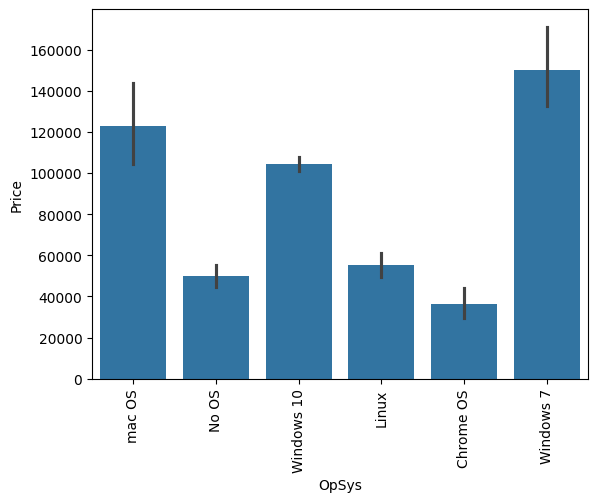

In [ ]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df[df['OpSys'] == 'Windows 10']['Price'].describe()

,Price
count,999.000000
mean,104300.167167
std,58624.172793
min,17093.000000
25%,60122.000000
50%,92544.000000
75%,133560.500000
max,436354.000000


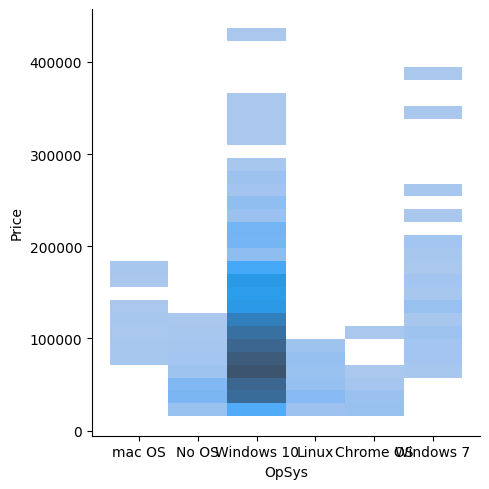

In [ ]:
sns.displot(data = df, x ='OpSys', y = 'Price')

In [ ]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen
893,Lenovo,Ultrabook,Intel Core i5,8,256GB SSD,Intel HD,Windows 10,1.32,160237,157.0,1,0
1009,HP,Notebook,Intel Core i3,4,500GB HDD,Intel HD,Windows 10,1.64,60924,112.0,0,0
1074,Lenovo,Ultrabook,Intel Core i7,8,256GB SSD,Intel HD,Windows 10,1.30,152621,176.0,1,1


In [ ]:
#Flash Storage
#SDD
#HDD
#Hybrid
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [ ]:
df['Memory'].str.split('+',n=1,expand=True).sample(5)

,0,1
986,1TB HDD,None
957,256GB SSD,None
397,256GB SSD,None
795,256GB SSD,None
1054,1TB SSD,None


In [ ]:
# SSD
# HDD
# Hybrid
# Flash Storage
new=df['Memory'].str.split('+',n=1,expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()
df['second']=new[1]

df['Layer1HDD']=df['first'].apply(lambda x:1 if "HDD" in x else 0) #
df['Layer1SSD']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['second'].fillna("0",inplace=True)

df['second']=df['second'].str.strip()
df['Layer2HDD']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second']=df['second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']

df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']

df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']

df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-162-ec09e9c49f89>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].fillna("0",inplace=True)


In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen,HDD,SSD,Hybrid,Flash_Storage
439,Asus,Notebook,Intel Core i5,4,256GB SSD,Intel HD,Linux,2.00,49790,141.0,0,0,0,256,0,0
687,Dell,Notebook,Intel Core i3,4,1TB HDD,AMD Radeon,Windows 10,2.20,48603,100.0,0,0,1,0,0,0
411,Lenovo,Ultrabook,Intel Core i7,8,512GB SSD,Nvidia GeForce,Windows 10,1.70,173063,210.0,1,0,0,512,0,0
116,HP,Notebook,Intel Core i7,8,512GB SSD,Intel UHD,Windows 10,1.63,96552,157.0,0,0,0,512,0,0
344,Dell,Ultrabook,Intel Core i7,8,256GB SSD,Intel UHD,Windows 10,1.20,140642,166.0,0,0,0,256,0,0


In [ ]:
df.to_csv('Cleaned.csv')

In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,IPS,TouchScreen,HDD,SSD,Hybrid,Flash_Storage
974,Asus,Gaming,Intel Core i7,16,256GB SSD + 1TB HDD,Nvidia GeForce,Windows 10,2.73,182585,127.0,0,0,1,256,0,0
243,Dell,Gaming,Intel Core i5,8,256GB SSD,Nvidia GeForce,Windows 10,2.56,78293,141.0,0,0,0,256,0,0
432,Lenovo,Notebook,Intel Core i3,4,128GB SSD,Intel HD,Windows 10,1.70,53353,157.0,1,0,0,128,0,0
1159,HP,2 in 1 Convertible,Intel Core i7,8,512GB SSD,Intel HD,Windows 10,1.48,181792,221.0,0,1,0,512,0,0
1045,HP,Notebook,Intel Core i5,8,256GB SSD + 500GB HDD,Intel HD,Windows 10,1.84,187344,141.0,0,0,500,256,0,0


# Lambda Theory with practical explanation 15 mins

In [ ]:
add = lambda x,y : x + y

In [ ]:
add(2,4)

6